In [1]:
# %%
# %%
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
import tensorflow as tf 

2023-09-17 15:13:08.696565: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Read the csv file and clean the data
stock_data = pd.read_csv('Resources/data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
price_columns = ['Close/Last', 'Open', 'High', 'Low']
for column in price_columns:
    stock_data[column] = stock_data[column].str.replace('$', '').astype(float)
msft_data = stock_data[stock_data['Company'] == 'MSFT']
msft_data = msft_data.sort_values(by="Date")
msft_data.head()

/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22677/1981658333.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stock_data[column] = stock_data[column].str.replace('$', '').astype(float)


,Company,Date,Close/Last,Volume,Open,High,Low
7547,MSFT,2013-07-18,35.44,48522740,35.720,35.89,35.22
7546,MSFT,2013-07-19,31.40,247534200,32.400,32.67,31.02
7545,MSFT,2013-07-22,32.01,78966800,31.700,32.01,31.60
7544,MSFT,2013-07-23,31.82,65809130,31.910,32.04,31.71
7543,MSFT,2013-07-24,31.96,52798940,32.035,32.19,31.89


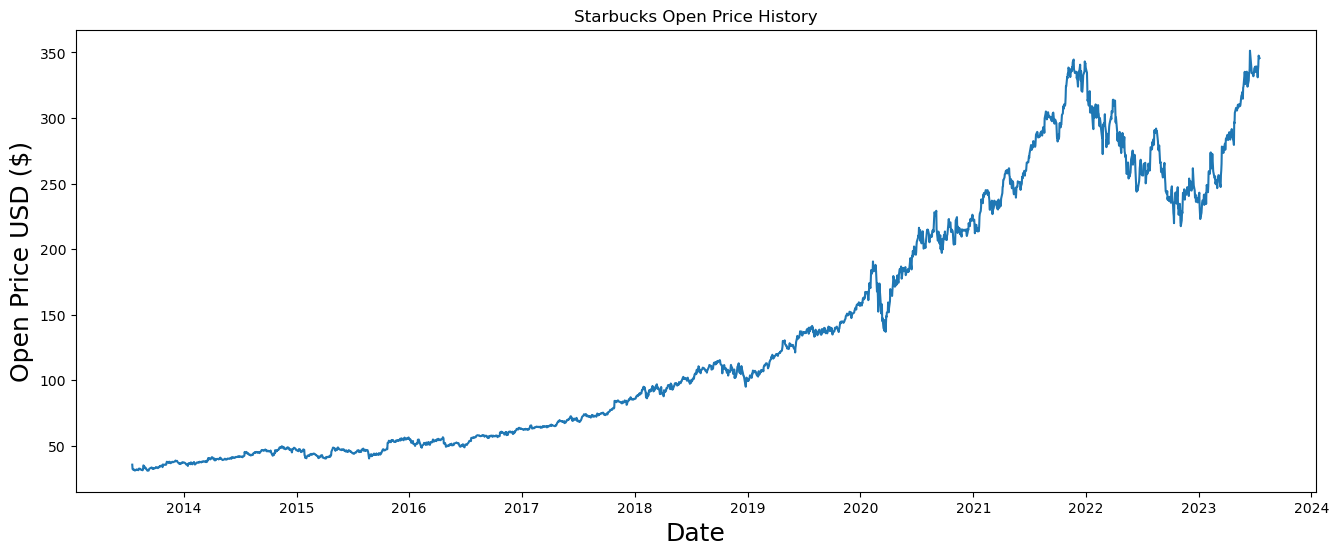

In [3]:
# Plotting the close price history
plt.figure(figsize=(16,6))
plt.title('Starbucks Open Price History')
plt.plot(msft_data['Date'], msft_data['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [4]:

df_test = msft_data.tail(40)
msft_df = msft_data.iloc[::-1]

# %%
msft_df['Open'].mean()


135.5529038155803

/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22677/33983959.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22677/33983959.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(msft_data[col])
/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22677/33983959.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-lev

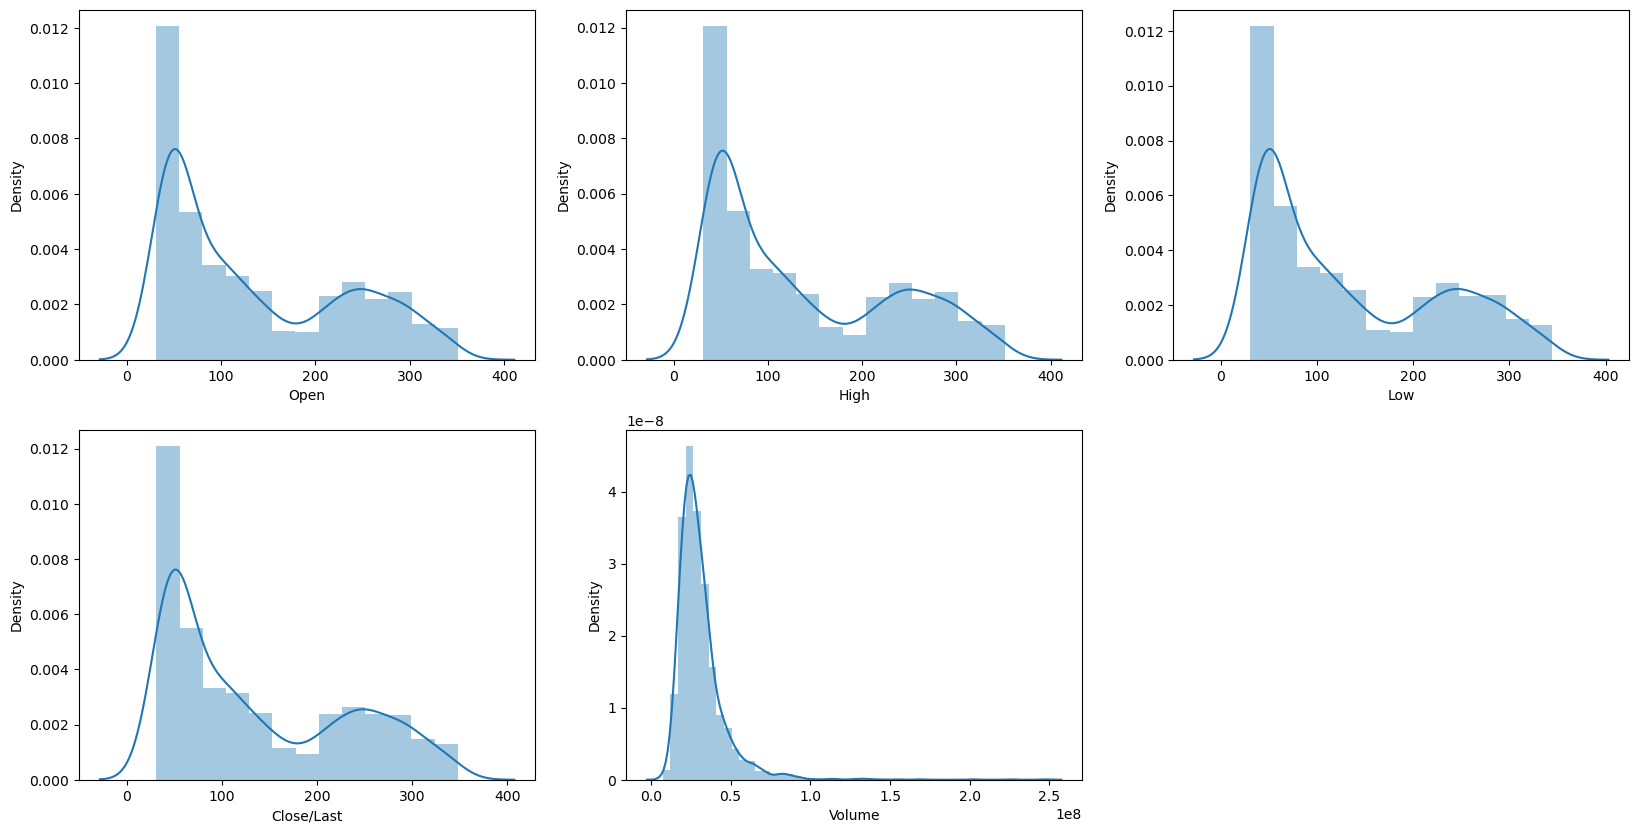

In [5]:
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close/Last', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(msft_data[col])
plt.show()

In [6]:
msft_data.describe()

# %%
msft_data

,Company,Date,Close/Last,Volume,Open,High,Low
7547,MSFT,2013-07-18,35.44,48522740,35.720,35.890,35.22
7546,MSFT,2013-07-19,31.40,247534200,32.400,32.670,31.02
7545,MSFT,2013-07-22,32.01,78966800,31.700,32.010,31.60
7544,MSFT,2013-07-23,31.82,65809130,31.910,32.040,31.71
7543,MSFT,2013-07-24,31.96,52798940,32.035,32.190,31.89
...,...,...,...,...,...,...,...
5036,MSFT,2023-07-11,332.47,26698220,331.060,332.860,327.00
5035,MSFT,2023-07-12,337.20,29995260,336.600,341.652,335.67
5034,MSFT,2023-07-13,342.66,20567160,339.560,343.740,339.02
5033,MSFT,2023-07-14,345.24,28352730,347.590,351.430,344.31


In [8]:
msft_data["Date"] = msft_data["Date"].astype(str) 
splitted = msft_data['Date'].str.split('-', expand=True)
 
msft_data['day'] = splitted[2].astype('int')
msft_data['month'] = splitted[1].astype('int')
msft_data['year'] = splitted[0].astype('int')
 
msft_data.head()

,Company,Date,Close/Last,Volume,Open,High,Low,day,month,year
7547,MSFT,2013-07-18,35.44,48522740,35.720,35.89,35.22,18,7,2013
7546,MSFT,2013-07-19,31.40,247534200,32.400,32.67,31.02,19,7,2013
7545,MSFT,2013-07-22,32.01,78966800,31.700,32.01,31.60,22,7,2013
7544,MSFT,2013-07-23,31.82,65809130,31.910,32.04,31.71,23,7,2013
7543,MSFT,2013-07-24,31.96,52798940,32.035,32.19,31.89,24,7,2013


In [9]:
# %%
msft_data.tail(5)

,Company,Date,Close/Last,Volume,Open,High,Low,day,month,year
5036,MSFT,2023-07-11,332.47,26698220,331.060,332.860,327.00,11,7,2023
5035,MSFT,2023-07-12,337.20,29995260,336.600,341.652,335.67,12,7,2023
5034,MSFT,2023-07-13,342.66,20567160,339.560,343.740,339.02,13,7,2023
5033,MSFT,2023-07-14,345.24,28352730,347.590,351.430,344.31,14,7,2023
5032,MSFT,2023-07-17,345.73,20363930,345.678,346.990,342.20,17,7,2023


In [10]:
msft_data.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
day           0
month         0
year          0
dtype: int64

In [11]:
msft_data['is_quarter_end'] = np.where(msft_data['month']%3==0,1,0)
msft_data.head()

,Company,Date,Close/Last,Volume,Open,High,Low,day,month,year,is_quarter_end
7547,MSFT,2013-07-18,35.44,48522740,35.720,35.89,35.22,18,7,2013,0
7546,MSFT,2013-07-19,31.40,247534200,32.400,32.67,31.02,19,7,2013,0
7545,MSFT,2013-07-22,32.01,78966800,31.700,32.01,31.60,22,7,2013,0
7544,MSFT,2013-07-23,31.82,65809130,31.910,32.04,31.71,23,7,2013,0
7543,MSFT,2013-07-24,31.96,52798940,32.035,32.19,31.89,24,7,2013,0


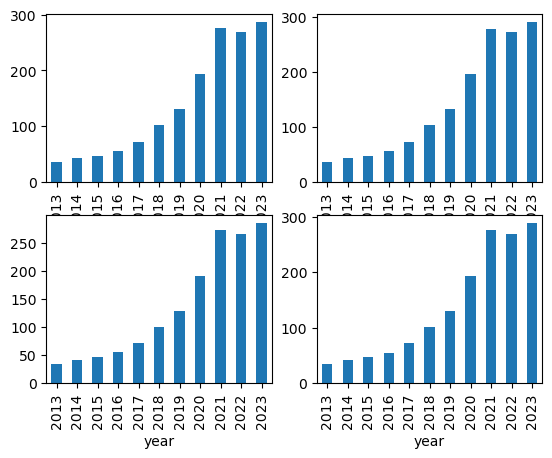

In [13]:
for i, col in enumerate(['Open', 'High', 'Low', 'Close/Last']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [14]:
msft_data.groupby('is_quarter_end').mean()


/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22677/2975722935.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  msft_data.groupby('is_quarter_end').mean()


,Close/Last,Volume,Open,High,Low,day,month,year
is_quarter_end,,,,,,,,
0,134.857655,3.085577e+07,134.786822,136.115041,133.426625,15.730931,6.096697,2018.040841
1,137.084317,3.168602e+07,137.051760,138.506004,135.573148,15.772033,7.431257,2018.024677


In [16]:
msft_data['open-close']  = msft_data['Open'] - msft_data['Close/Last']
msft_data['low-high']  = msft_data['Low'] - msft_data['High']
msft_data['target'] = np.where(msft_data['Close/Last'].shift(-1) > msft_data['Close/Last'], 1, 0)
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
features = msft_data[['open-close', 'low-high', 'is_quarter_end']]
target = msft_data['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2264, 3) (252, 3)


In [18]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC

# %%
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5400376351657981
Validation Accuracy :  0.4927104462474645

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.45707595887517016
Validation Accuracy :  0.5067190669371197

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

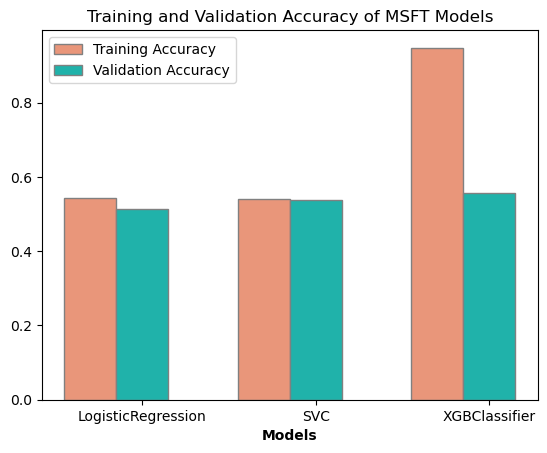

In [21]:
# Model names
models_name = ['LogisticRegression', 'SVC', 'XGBClassifier']

# Training accuracy values
train_acc = [0.5418181547730888, 0.5406277792391616, 0.9477961024889456]

# Validation accuracy values
val_acc = [0.5128383506197824, 0.5373134328358209, 0.5576460915760182]

# Bar width
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(train_acc))
r2 = [x + barWidth for x in r1]

# Create blue bars for training accuracy
plt.bar(r1, train_acc, color='darksalmon', width=barWidth, edgecolor='grey', label='Training Accuracy')

# Create red bars for validation accuracy
plt.bar(r2, val_acc, color='lightseagreen', width=barWidth, edgecolor='grey', label='Validation Accuracy')

# Title & Subtitle
plt.title('Training and Validation Accuracy of MSFT Models')
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_acc))], models_name)

# Create legend & Show graphic
plt.legend()
plt.show()